In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from calculator import *

data = pd.read_csv('../data/res_evaluated.csv')
pd.set_option('display.max_columns',200)

3.1(Кореляційний аналіз):
Взяти дві змінні для дослідження кореляційної залежності.<br>
Для теста №1 за одну змінну взяти  дані деякої групи, в якості другої змінної взяти оцінки з математики <br>
Для теста №2 за одну змінну взяти бали мотивації для математичного предмета, в якості другої змінної бали мотивації цих же студентів для гуманітарного предмета.<br>
Для теста №3 за одну змінну взяти бали мотивації за шкалою “професійна діяльність”, в якості другої змінної бали мотивації цих же студентів для якоїсь іншої шкали.<br>

In [2]:
test_1 = {'x': data.loc[data['Курс']==4]['Улюблений предмет'].values, 'y':data.loc[data['Курс']==4]['Оцінка з цього предмету:'].values}
test_2 = {'x': data.loc[data['Курс']==4]['Test#2: Рівняння мат. фізики'].values, 'y':data.loc[data['Курс']==4]['Test#2: Технології прикладного програмування'].values}
test_3 = {'x': data[data['Курс']==4]['Професійні мотиви'].values, 'y': data[data['Курс']==4]['Мотиви творчої самореалізації'].values}

*	Знайти вибіркові коефіцієнту кореляції Пірсона, Спірмена та Кенделла та перевірити їхню значущість за допомогою параметричного критерію Пірсона та непараметричних Спірмена та Кенделла.
*	Застосувати можливості Пайтона для знаходження коефіцієнту кореляції Пірсона, Спірмена та Кенделла і перевірки цих коефіцієнтів на значущість. 

In [3]:
def pearson_correlation(x,y):
    """
    Pearson correlation coefficient r and p-value p for testing non-correlation
    """
    def cov(x,y):
        res = (x - mean(x))*(y-mean(y))
        return res.sum()/(x.shape[0]-1)
    
    def corr(x,y):
        return cov(x,y)/(stddev(x)*stddev(y))
    
    def t_value(r,x):
        n = x.shape[0]
        return r * np.sqrt(n-2) / np.sqrt(1-r**2)
    
    def p_value(r,x):
        n = x.shape[0]
        t = t_value(r,x)
        
        return stats.t.sf(t,df=n-2)#1-t.cdf(t,n-2)
    
    r = corr(x,y)
    p = 2*(p_value(r,x))
    return r,p

In [4]:
pearson_correlation(test_1['x'],test_1['y'])

(0.5115483144972256, 0.004563363106501617)

In [5]:
stats.pearsonr(test_1['x'],test_1['y'])

(0.5115483144972258, 0.004563363106501603)

In [6]:
def spearman_correlation(x,y):
    """
    Spearman correlation coefficient r and p-value p for testing non-correlation
    """
    def corr(x,y):
        n = x.shape[0]
        rank_data=42
        return 1 - (6*rank_data)/(n**3-n)
    

    
    r = corr(x,y)
    p = 0
    return r,p

In [7]:
def kendall_correlation(x,y):
    """
    Kendall correlation coefficient r and p-value p for testing non-correlation
    """
    def corr(x,y):
        n = x.shape[0]
        R = 42
        
        return 4*R/(n**2-n) - 1
    
    r = corr(x,y)
    p = 0
    return r,p

In [8]:
spearman_correlation(test_1['x'],test_1['y'])

(0.9896551724137931, 0)

In [10]:
stats.spearmanr(test_1['x'],test_1['y'])

SpearmanrResult(correlation=0.5412714348395541, pvalue=0.0024282474368559556)

In [11]:
stats.kendalltau(test_1['x'],test_1['y'])

KendalltauResult(correlation=0.42971314287974627, pvalue=0.0030388458780621253)

3.2(Регресійний аналіз):

*	Побудувати регресійну модель залежності однієї змінної  від іншої методом найменших квадратів та за умови відомого коефіцієнта кореляції Пірсона.
*	Побудувати регресійну модель в Пайтоні,  провести аналіз залишків різними методами. 

In [12]:
from sklearn.base import BaseEstimator

class OLS(BaseEstimator):
    def __init__(self):
        super(OLS,self).__init__()
        
    def fit(self,X,y=None):
        self.r_,_ = pearson_correlation(X,y)
        
        self.beta_ = self.r_*stddev(y)/stddev(X)
        self.alpha_ = mean(y) - mean(X)*self.beta_
        return self
        
    def predict(self,X,y=None):
        try:
            getattr(self, "beta_")
            getattr(self, "alpha_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        
        return self.alpha_ + X*self.beta_

In [13]:
ols = OLS().fit(test_1['x'],test_1['y'])
prediction = ols.predict(test_1['x'])
print(f'slope:{ols.beta_:.4f},intercept:{ols.alpha_:.4f}')

slope:0.5015,intercept:49.4877


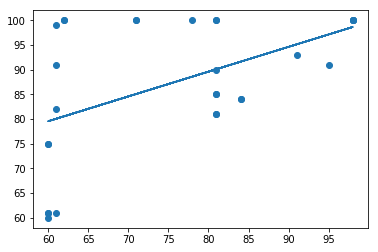

In [14]:
plt.scatter(test_1['x'],test_1['y'])
plt.plot(test_1['x'],prediction)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression().fit(test_1['x'].reshape(-1,1),test_1['y'].reshape(-1,1))
print(f'slope:{lr.coef_[0][0]:.4f},intercept:{lr.intercept_[0]:.4f}\nMSE: {mean_squared_error(prediction,test_1["x"]):.4f}')

slope:0.5015,intercept:49.4877
MSE: 182.5456
